# Parts A an B

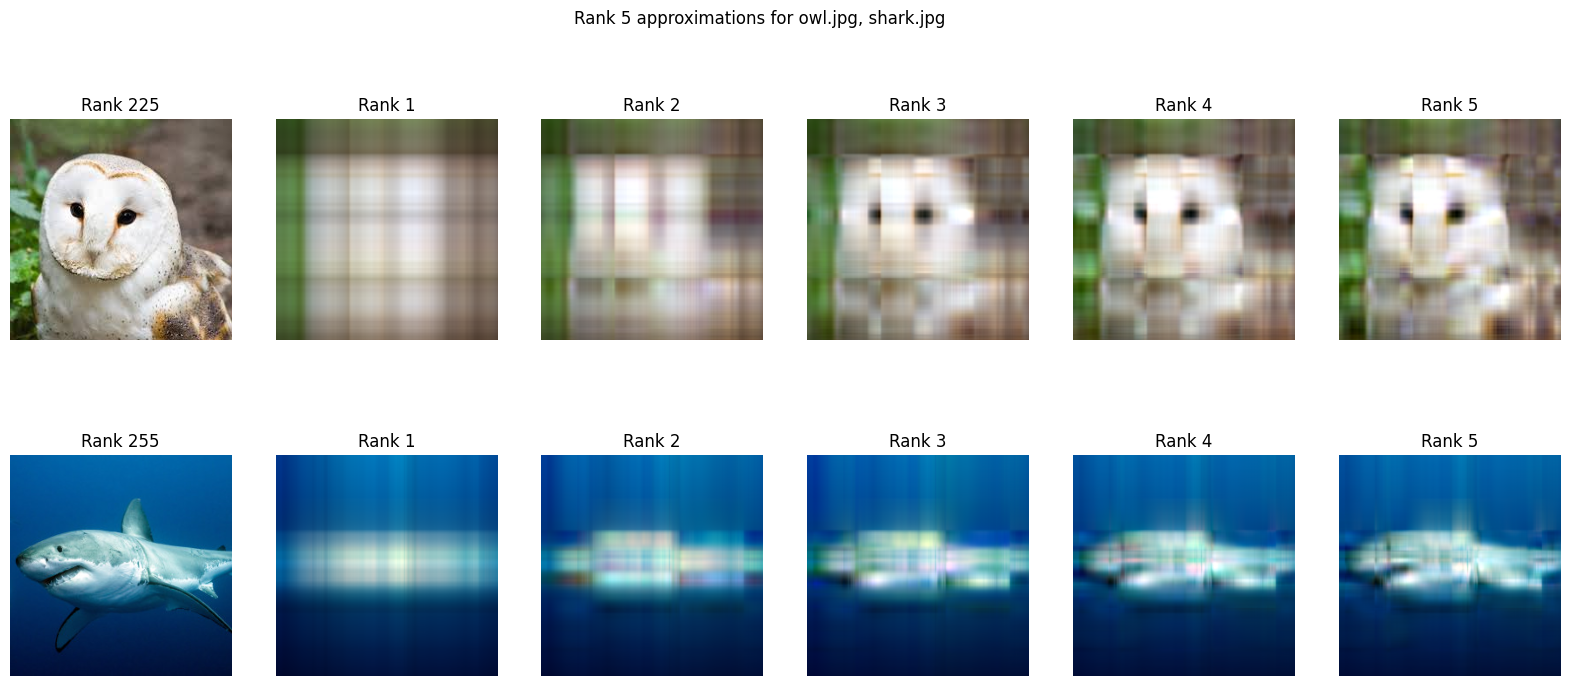

In [129]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def rank_approximation(A, r):
    U, s, VT = np.linalg.svd(A)

    return U[:, :r] * s[:r] @ VT[:r]

def read_image(filename):
    image = mpimg.imread(filename).astype(np.float64)

    if image.max() > 1.:
        image /= 255.

    if image.shape[2] > NUM_CHANNELS:
        image = image[..., :NUM_CHANNELS]

    return image

CHANNEL_NAMES = ['R', 'G', 'B']
NUM_CHANNELS = len(CHANNEL_NAMES)

FILENAMES = ['owl.jpg', 'shark.jpg']

fig, axes = plt.subplots(nrows=len(FILENAMES), ncols=RANKS + 1, figsize=[20, 8])

fig.suptitle(f"Rank {RANKS} approximations for {', '.join(FILENAMES)}")

for i, filename in enumerate(FILENAMES):
    image = read_image(filename)

    for j, rank in enumerate([min(image.shape[:2])] + list(range(1, RANKS + 1))):
        # Running this logic for the max rank isn't really neccessary, but oh well

        new_image = np.zeros_like(image)

        for channel_index in range(NUM_CHANNELS):
            new_image[..., channel_index] = rank_approximation(image[..., channel_index], rank)

        axis = axes[i, j]

        axis.set_title(f"Rank {rank}")
        axis.imshow(np.clip(new_image, 0., 1.))
        axis.axis('off')

# Part C

For an $n \times n$ matrix, a total of $k(2n + 1)$ numbers are required for a rank $k$ approximation

This means that the maximum rank approximation which isn't worse than the original matrix is $\frac{n^2}{2n+1}$, which approaches $\frac{1}{2}n$ as n gets large 


# Part D

For Part D, we will analyse what happens when a specific channel has a rank 10 approximation, and the other 2 are rank 1

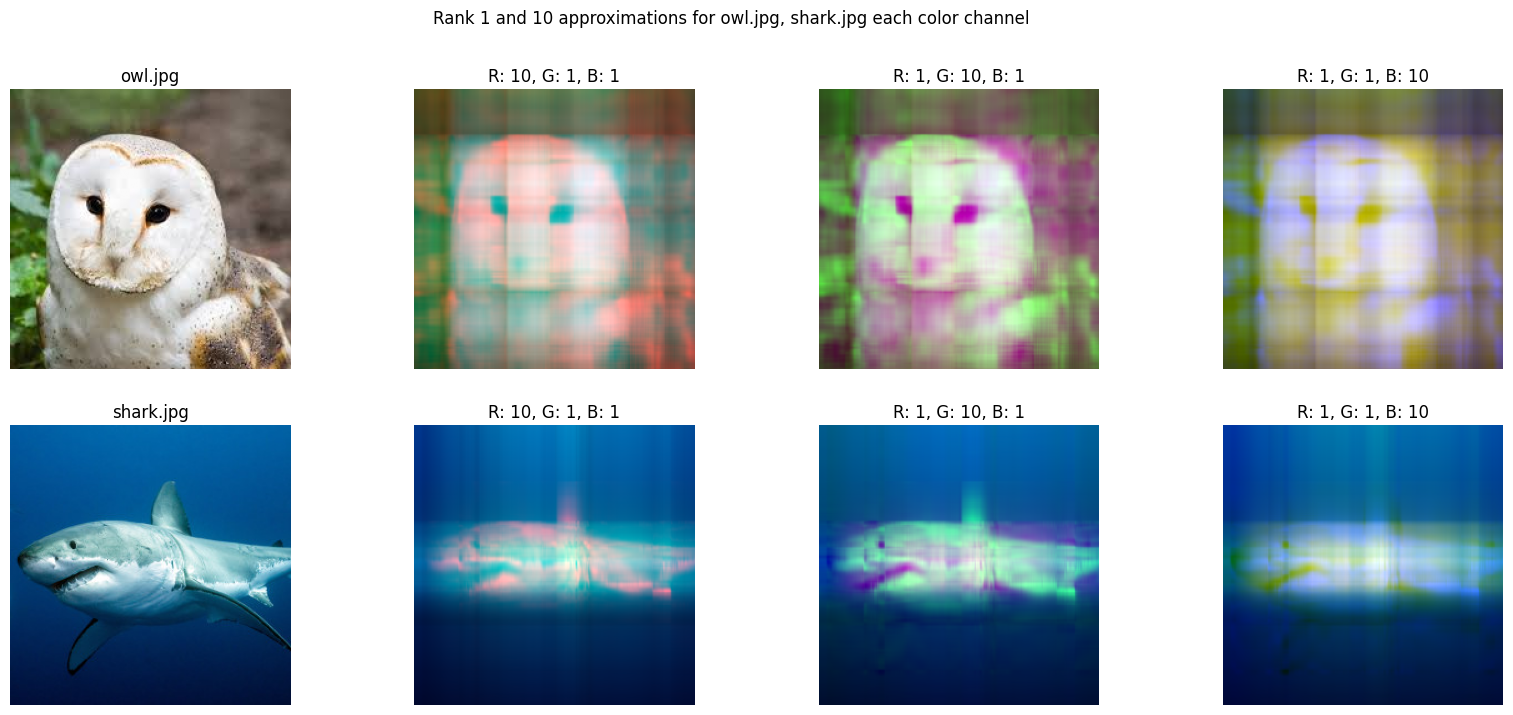

In [133]:
fig, axes = plt.subplots(nrows=len(FILENAMES), ncols=NUM_CHANNELS + 1, figsize=[20, 8])

fig.suptitle(f"Rank 1 and 10 approximations for {', '.join(FILENAMES)} each color channel")

for i, filename in enumerate(FILENAMES):
    image = read_image(filename)

    axes[i, 0].set_title(filename)
    axes[i, 0].imshow(np.clip(image, 0., 1.))
    axes[i, 0].axis('off')

    for j in range(NUM_CHANNELS):
        new_image = np.zeros_like(image)

        for channel_index in range(NUM_CHANNELS):
            new_image[..., channel_index] = rank_approximation(image[..., channel_index], 10 if channel_index == j else 1)

        axis = axes[i, j + 1]

        axis.set_title(', '.join([f"{name}: {10 if channel_index == j else 1}" for channel_index, name in enumerate(CHANNEL_NAMES)]))
        axis.imshow(np.clip(new_image, 0., 1.))
        axis.axis('off')

        

For Both images, the green channel appears to produce the most crisp image